In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading Data

In [2]:
train_data = pd.read_csv('data/training_data_fall2024.csv')

In [3]:
"""
Feature Name            |   Description
____________________________________________________________________________________________________________

increase_stock          |   low_bike_demand - no need to increase the number of bikes
(prediction label)      |   high_bike_demand - the number of bikes needs to be increased
____________________________________________________________________________________________________________

hour_of_day             |   Hour of the day (from 0 to 23)
day_of_week             |   Day of the week (from 0 - Monday to 6 - Sunday)
month                   |   Month (from 0 - January to 12 - December)
holiday                 |   If it is a holiday or not (0 - no holiday, 1 - holiday)
weekday                 |   If it is a weekday or not (0 - weekend, 1 - weekday)
summertime              |   If it is summertime or not (0 - no summertime, 1 - summertime)
temp                    |   Temperature in Celsius degrees.
dew                     |   Dew point in Celsius degrees.
humidity                |   Relative humidity (percentage)
precip                  |   Precipitation in mm
snow                    |   Amount of snow in the last hour in mm
snow_depth              |   Accumulated amount of snow in mm
windspeed               |   Wind speed in km/h
cloudcover              |   Percentage of the city covered in clouds
visibility              |   Distance in km at which objects or landmarks can be clearly seen and identified.

""";

#### Exploratory Analysis

In [4]:
train_data.tail()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand
1599,22,6,2,0,0,0,4.2,1.7,84.11,1.081,0,0.0,21.9,97.4,16.0,low_bike_demand


We can see that the following columns are categorical:

In [5]:
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime']

In [6]:
# Split into features (X) and label (y)
X = train_data.copy()
y = X.pop('increase_stock')

### Exploring numerical features

C:\Users\abarg\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\abarg\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\abarg\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


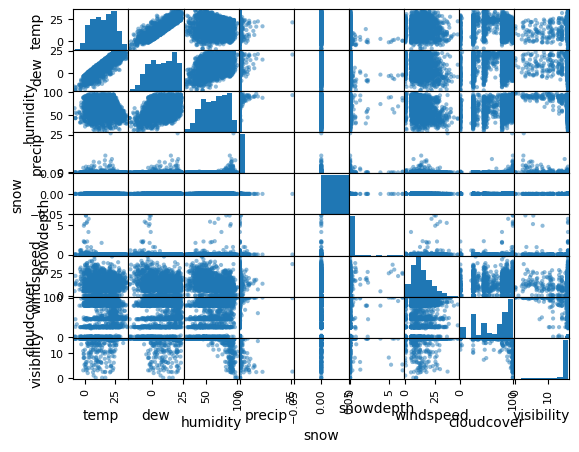

In [7]:
# Scatter matrix with non-categorical features
pd.plotting.scatter_matrix(X.drop(columns=cat_features));

Seems to exist a linear relationship between temp and dew, and between dew and humidity. No other relevant relationships at first sight

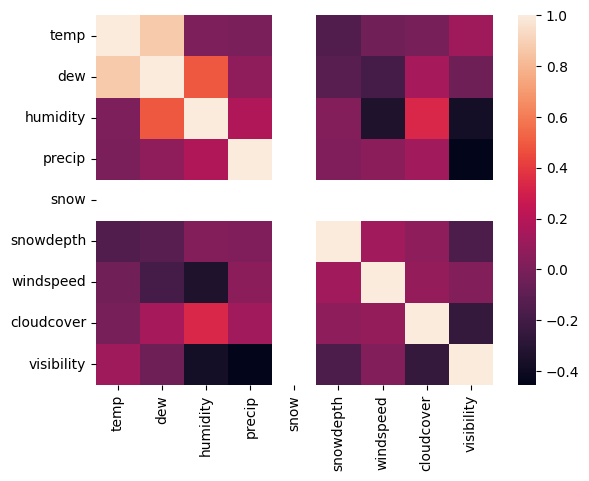

In [8]:
corr = X.drop(columns=cat_features).corr(numeric_only=True)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

### Exploring categorical features

#### Hour of day

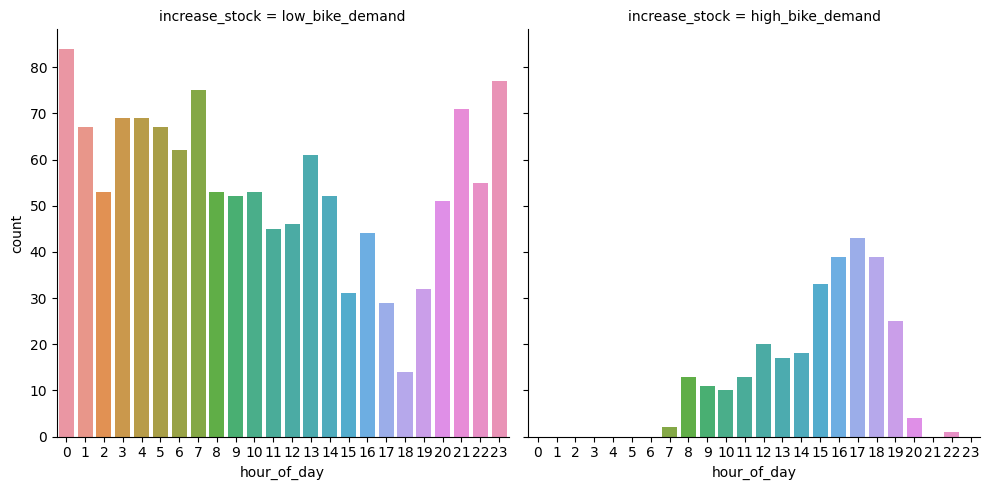

In [9]:
# Plot hour of day
sns.catplot(
    x='hour_of_day',
    col='increase_stock',
    kind='count',
    data=train_data
);

Seems to be a higher demand of bikes during the afternoon (16-18h)

* *Could be useful to add a morning_afternoon_night feature*

#### Day of week

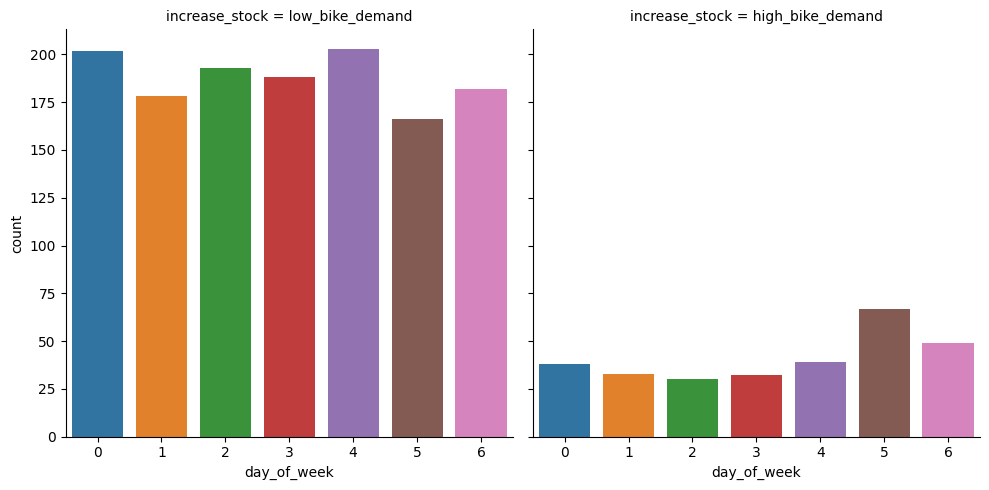

In [10]:
# Plot day of week
sns.catplot(
    x='day_of_week',
    col='increase_stock',
    kind='count',
    data=train_data
);

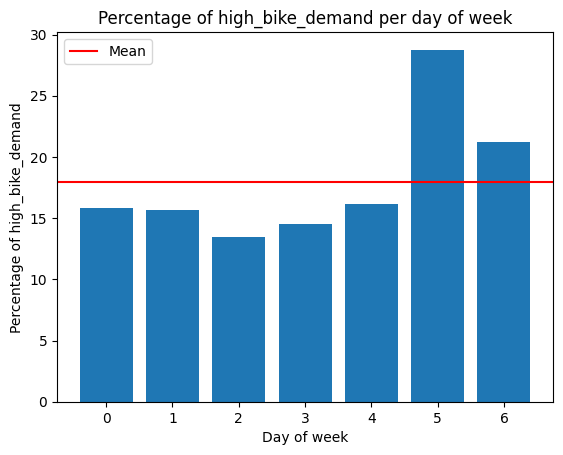

In [11]:
day_of_week_high = train_data[train_data['increase_stock'] == 'high_bike_demand'].value_counts(['day_of_week'])
day_of_week_total = train_data.value_counts(['day_of_week'])
day_of_week_perc = round(day_of_week_high / day_of_week_total * 100, 2)

plt.axhline(day_of_week_perc.values.mean(), color='red', label='Mean')
plt.bar(np.arange(0, 7), day_of_week_perc.values)

plt.legend()
plt.ylabel('Percentage of high_bike_demand')
plt.xlabel('Day of week')
plt.title('Percentage of high_bike_demand per day of week')

plt.show()

Seems to be a significant higher demand on weekends, specially on saturdays. No other significant differences regarding the day of the week

* There is already a feature that does the classification between weekday or weekend

#### Month

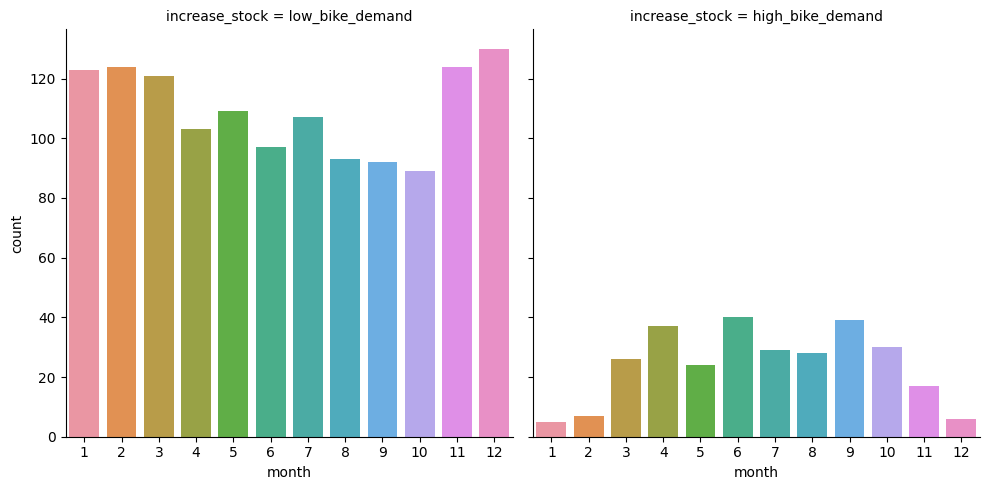

In [12]:
# Plot month
sns.catplot(
    x='month',
    col='increase_stock',
    kind='count',
    data=train_data
);

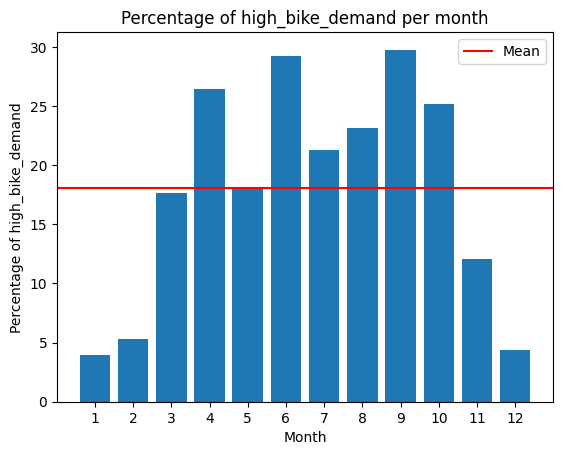

In [13]:
month_high = train_data[train_data['increase_stock'] == 'high_bike_demand'].value_counts(['month'])
month_total = train_data.value_counts(['month'])
month_perc = round(month_high / month_total * 100, 2)

plt.axhline(month_perc.values.mean(), color='red', label='Mean')
plt.bar(np.arange(1, 13), month_perc.values)

plt.legend()
plt.ylabel('Percentage of high_bike_demand')
plt.xticks(np.arange(1, 13))
plt.xlabel('Month')
plt.title('Percentage of high_bike_demand per month')

plt.show()

It seems that there is a considerably **higher demand** of bikes from **March-April to October** than from November to February-March

* *If we check the average temperature in Washington DC, we can see that March-October are hotter months than November-February* \
Font: https://weatherspark.com/y/20957/Average-Weather-in-Washington-D.C.;-United-States-Year-Round

#### Holiday

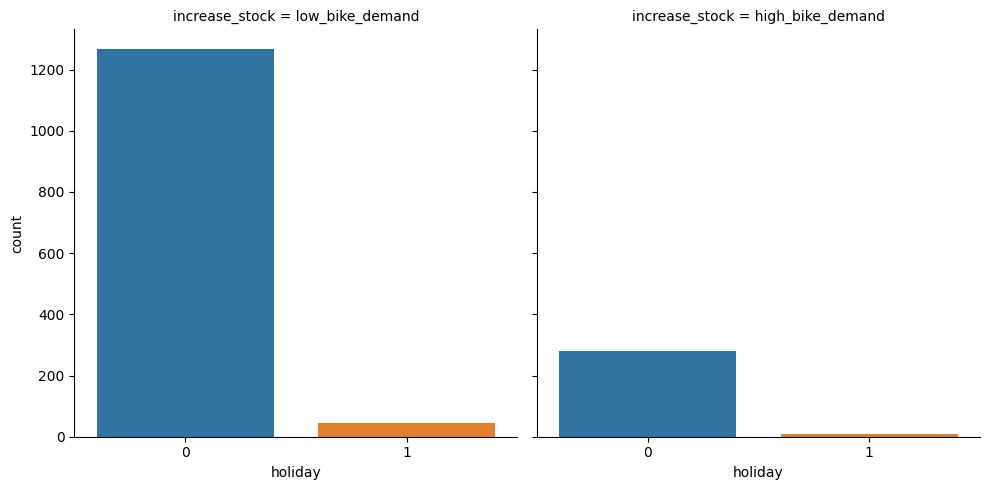

In [14]:
# Plot holiday
sns.catplot(
    x='holiday',
    col='increase_stock',
    kind='count',
    data=train_data
);

In [15]:
train_data.value_counts(['holiday'])

holiday
0          1547
1            53
dtype: int64

As there is no much holidays, no conclusions can be derived from the catplot.

In [16]:
holiday_high = train_data[train_data['increase_stock'] == 'high_bike_demand'].value_counts(['holiday'])
holiday_total = train_data.value_counts(['holiday'])
holiday_perc = round(holiday_high / holiday_total * 100, 2)

print(f"Percentage of high_bike_demand on holidays: {holiday_perc[1]}%")
print(f"Percentage of high_bike_demand on not holidays: {holiday_perc[0]}%")

Percentage of high_bike_demand on holidays: 16.98%
Percentage of high_bike_demand on not holidays: 18.03%


There are no significant differences in terms of demand on holidays.

#### Weekday

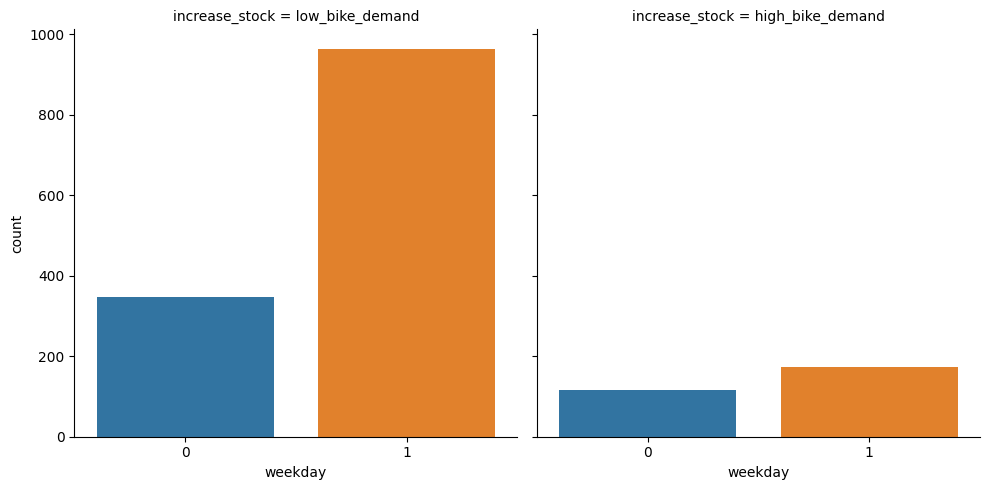

In [17]:
# Plot weekday
sns.catplot(
    x='weekday',
    col='increase_stock',
    kind='count',
    data=train_data
);

It seems that there might be a higher demand during weekends, but further analysis should be done due to that there is a lot more data of weekdays.

In [18]:
weekday_high = train_data[train_data['increase_stock'] == 'high_bike_demand'].value_counts(['weekday'])
weekday_total = train_data.value_counts(['weekday'])
weekday_perc = round(weekday_high / weekday_total * 100, 2)

print(f"Percentage of high_bike_demand during weekends: {weekday_perc[0]}%")
print(f"Percentage of high_bike_demand during weekdays: {weekday_perc[1]}%")

Percentage of high_bike_demand during weekends: 25.0%
Percentage of high_bike_demand during weekdays: 15.14%


Regarding the existant data, there is a 10% increased demand during weekends.

#### Summertime

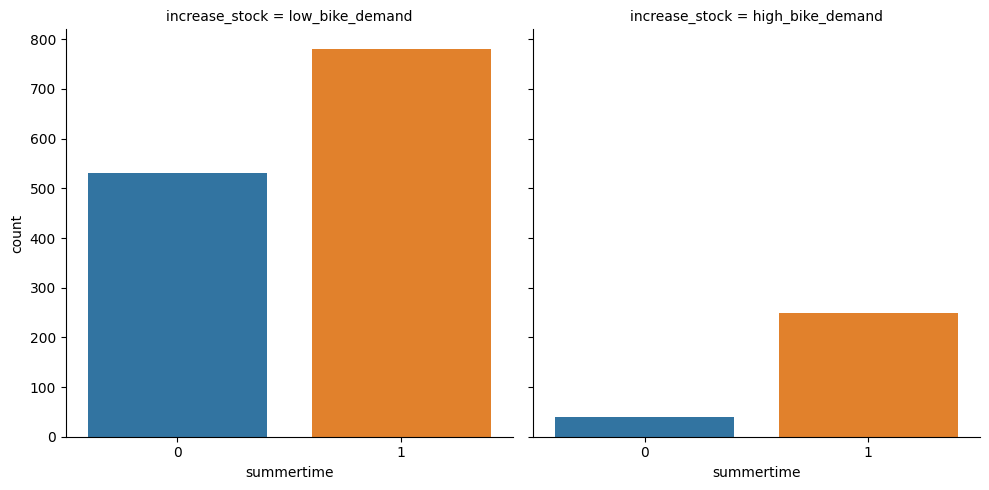

In [19]:
# Plot summertime
sns.catplot(
    x='summertime',
    col='increase_stock',
    kind='count',
    data=train_data
);

In [20]:
train_data.value_counts(['summertime'])

summertime
1             1030
0              570
dtype: int64

Regarding the catplot, it seems that there is a lower demand of bikes during wintertime. But as we have near the double amount of values for summertime than for wintertime, more analysis should be done.

In [21]:
summertime_high = train_data[train_data['increase_stock'] == 'high_bike_demand'].value_counts(['summertime'])
summertime_total = train_data.value_counts(['summertime'])
summertime_perc = round(summertime_high / summertime_total * 100, 2)

print(f"Percentage of high_bike_demand during wintertime: {summertime_perc[0]}%")
print(f"Percentage of high_bike_demand during summertime: {summertime_perc[1]}%")

Percentage of high_bike_demand during wintertime: 6.84%
Percentage of high_bike_demand during summertime: 24.17%


It seems that there is a higher bike demand during summertime